# Загружаем нужные библиотеки:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Загружаем данные:

In [2]:
from sklearn.datasets import fetch_openml

# Загружаем данные из https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', return_X_y = True)

In [3]:
X.shape

(70000, 784)

### Посмотрим на некоторые изображения:

In [15]:
def draw_digit(Img, digit_true, digit_pred = ''):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(Img, (28, 28)))
    plt.text(0, 27, str(digit_true), color = 'b')
    plt.text(0, 1, str(digit_pred), color = 'r')
    plt.set_cmap('binary')    
    #plt.set_cmap('gray')    

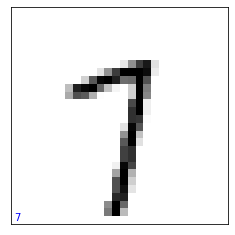

In [16]:
draw_digit(X[42, :], y[42])

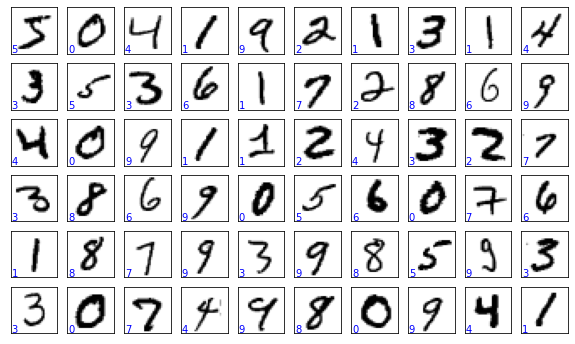

In [17]:
plt.figure(figsize = (10, 6))
for i_subplot in range(60):
    plt.subplot(6, 10, i_subplot + 1)
    draw_digit(X[i_subplot, :], y[i_subplot])

### Разбиваем данные на обучающую и тестовую выборки

In [7]:
N_test = 10000
N_train = X.shape[0] - N_test

Некоторые методы требуют для обучения много времени. Чтобы долго не ждать, возьмем не все данные, а только часть:

In [19]:
N_test = 1000
N_train = 6000

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = N_train, test_size = N_test, 
                                                    stratify = y, random_state = 42)

In [21]:
X_train.shape, X_test.shape

((6000, 784), (1000, 784))

### Обучаем классификатор kNN

*Евклидово расстояние* ($\ell_2$-метрика):
$$
\rho_2(x,x') = \sqrt{\sum_{j=1}^d (x_j - x_j')^2}
$$

*Манхеттеновское расстояние* ($\ell_1$-метрика):
$$
\rho_1(x,x') = \sum_{j=1}^d |x_j - x_j'|
$$


*Чебышевское расстояние* ($\ell_{\infty}$-метрика):
$$
\rho_{\infty}(x,x') = \max_{j=1,\dots,d} |x_j - x_j'|
$$

*Расстояние Минковского*:
$$
\rho_p(x,x') = \left(\sum_{j=1}^d |x_j - x_j'|^p\right)^{1/p} \qquad (p\ge 1)
$$


In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1, p=3)
model.fit(X_train, y_train)

KNeighborsClassifier()

### Теперь можем классифицировать:

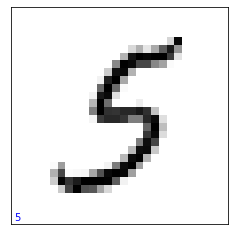

In [27]:
No = 42
Img = X_test[No, :]
dig = y_test[No]
draw_digit(Img, dig)

In [29]:
model.predict([Img])

array(['5'], dtype=object)

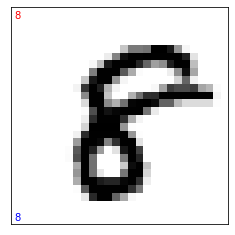

In [38]:
No = 42
Img = X_test[No, :]
dig = y_test[No]
dig_pred = model.predict([Img])[0]
draw_digit(Img, dig, dig_pred)

### Проверяем качество классификатора

In [31]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

y_train != y_train_pred

Ошибки на обучающей и тестовой выборках:

In [39]:
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.038, 0.065)

Можно так:

In [40]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.962, 0.935)

In [41]:
1 - model.score(X_test, y_test)

0.06499999999999995

### Матрица рассогласования:

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[ 98,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0, 111,   1,   0,   0,   0,   0,   1,   0,   0],
       [  1,   6,  89,   0,   0,   1,   0,   1,   1,   1],
       [  0,   1,   2,  95,   0,   1,   0,   0,   2,   1],
       [  0,   1,   0,   0,  91,   0,   1,   0,   0,   4],
       [  2,   1,   0,   1,   0,  84,   2,   0,   0,   0],
       [  1,   2,   0,   0,   0,   0,  95,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0, 100,   0,   3],
       [  1,   2,   0,   2,   0,   3,   1,   1,  86,   2],
       [  1,   0,   0,   0,   7,   1,   0,   4,   0,  86]], dtype=int64)

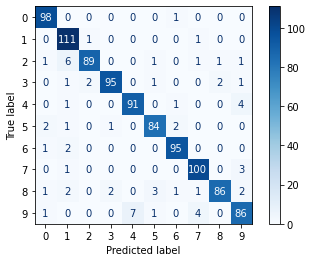

In [43]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
pass

### Другие метрики качества:

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97        99
           1       0.89      0.98      0.93       113
           2       0.97      0.89      0.93       100
           3       0.97      0.93      0.95       102
           4       0.93      0.94      0.93        97
           5       0.93      0.93      0.93        90
           6       0.95      0.97      0.96        98
           7       0.93      0.96      0.95       104
           8       0.97      0.88      0.92        98
           9       0.89      0.87      0.88        99

    accuracy                           0.94      1000
   macro avg       0.94      0.93      0.93      1000
weighted avg       0.94      0.94      0.93      1000



${\rm error} = \frac{{\rm FP} + {\rm FN}}{{\rm TP} + {\rm TN} + {\rm FP} + {\rm FN}}$ 

${\rm accuracy} = \frac{{\rm TP} + {\rm TN}}{{\rm TP} + {\rm TN} + {\rm FP} + {\rm FN}} = 1 - {\rm error}$ 

${\rm precision} = \frac{{\rm TP}}{{\rm FP}+{\rm TP}}$ 

${\rm recall} = \frac{{\rm TP}}{{\rm FN}+{\rm TP}}$ 

$F_1 = 2\cdot\frac{{\rm precision}\cdot{\rm recall}}{{\rm precision}+{\rm recall}}$ 





### Все ошибки:

ValueError: num must be 1 <= num <= 64, not 65

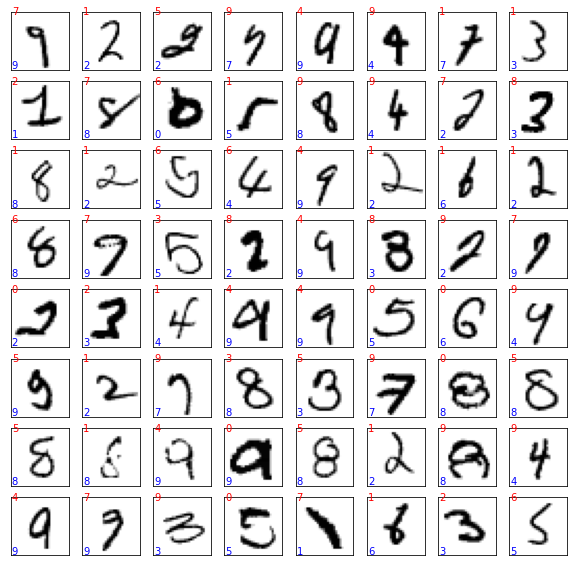

In [45]:
plt.figure(figsize = (10, 10))
i_subplot = 1 
for i in range(N_test):
    Img = X_test[i, :]
    dig = y_test[i]
    dig_pred = model.predict([Img])[0]
    if dig_pred != dig:
        plt.subplot(8, 8, i_subplot)
        draw_digit(Img, dig, dig_pred)
        i_subplot += 1

В библиотеке scikit-learn реализована масса алгоритмов машинного обучения.

#### Некоторые алгоритмы машинного обучения, реализованные в scikit-learn:

 Метод                                     |  Класс
-------------------------------------------|--------------------------------------------         
 kNN – $k$ ближайших соседей               | `sklearn.neighbors.KNeighborsClassifier`
 LDA – линейный дискриминантный анализ     | `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`
 QDA – квадратичный дискриминантный анализ | `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis`
 Logistic – логистическая регрессия        | `sklearn.linear_model.LogisticRegression`
 SVC – машина опорных векторов             | `sklearn.svm.SVC`
 Tree – деревья решений                    | `sklearn.tree.DecisionTreeClassifier`
 RF – случайный лес                        | `sklearn.ensemble.RandomForestClassifier`
 ExtrRF – экстремально случайный лес       | `sklearn.ensemble.ExtraTreesClassifier`
 AdaBoost – алгоритм AdaBoost              | `sklearn.ensemble.AdaBoostClassifier`
 GBT – градиентный бустинг деревьев решений| `sklearn.ensemble.GradientBoostingClassifier`
 Нейронные сети                            | `sklearn.neural_network.MLPClassifier`
 



#### Основные методы классов, реализующих алгоритмы машинного обучения
Все алгоритмы выполнены в виде классов, обладающих по крайней мере следующими методами:



   Метод класса            |  Описание     
 --------------------------|-------------------------------------------------------------
  `fit(X_train, y_train)`              |  обучение (тренировка) модели на обучающей выборке `X_train`, `y_train`
  `predict(X)`             |  предсказание на данных `X`
  `set_params(**params)`   |  установка параметров алгоритма
  `get_params()`           |  чтение параметров алгоритма
 
 Заметим, что параметры алгоритмов обучения можно задавать как в конструкторе класса, так и с помощью метода `set_params(**params)`.
 
 #### Таблица наличия/отсутствия методов для основных алгоритмов машинного обучения:
 
    
   Методы класса               | kNN | LDA | QDA | Logistic | SVC | Tree | RF | AdaBoost | GBT     
 ------------------------------|-----|-----|-----|----------|-----|------|----|----------|------
  `fit(X, y)`                  |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict(X)`                 |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict_proba(X)`           |  +  |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `predict_log_proba(X)`       |     |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `score(X, y)`                |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `decision_function(X)`       |     |  +  |  +  |    +     |  +  |      |    |    +     |  +
  `transform(X)`               |     |  +  |     |    +     |     |  +   | +  |          |  +
  `staged_decision_function(X)`|     |     |     |          |     |      |    |    +     |  +    
  `staged_predict(X)`          |     |     |     |          |     |      |    |    +     |  +
  `staged_predict_proba(X)`    |     |     |     |          |     |      |    |    +     |  +
  `staged_score(X, y)`         |     |     |     |          |     |      |    |    +     |  +
  `set_params(**params)`       |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `get_params()`               |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
    
    

### Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

C:\Users\nikol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.058916666666666666, 0.0802)

### Нейронные сети (MLP - Multi Layer Perceptron)

In [46]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes = (30,), random_state = 42)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(30,), random_state=42)

In [48]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.042, 0.119)

In [49]:
model = MLPClassifier(hidden_layer_sizes = (300, 100), random_state = 42)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(300, 100), random_state=42)

In [50]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.0045, 0.097)

### Машина опорных векторов

In [51]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [52]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.016833333333333332, 0.041)

In [ ]:
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

In [ ]:
model = SVC(kernel = 'poly')
model.fit(X_train, y_train)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

### Подбор *гипер*параметров

Подберем _оптимальное_ значение параметра регуляризации `alpha`

(Можно вместо циклов, написанных руками, использовать `sklearn.model_selection.GridSearchCV` и т.п.)

In [ ]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

C:\Users\nikol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\nikol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\nikol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

KeyboardInterrupt: 

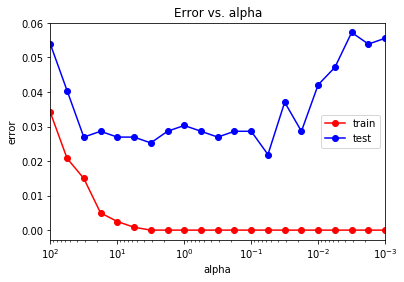

In [ ]:
plt.semilogx(alpha_arr, train_err, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'b-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки:

In [ ]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0218855218855


Оптимальное значение `alpha`:

In [ ]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[ 0.05623413]


In [ ]:
alpha_opt = alpha_opt[0]

### Классификатор при найденном _оптимальном_ значении `alpha`:

Повторим обучение:

In [ ]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0
0.0218855218855
